<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Author:_ Jeff Hale, Tim Book

### Learning objectives 
- Explain what supervised learning is
- Explain what a regression problem is
- Explain what a model is
- Set up a DataFrame for modeling (without TTS)
- Explain what linear regression is doing at a high level
- Instantiate, fit, generate predictions from, and evaluate a linear regression model in `scikit-learn`
- Interpret the coefficients of a linear regression model


### Prior knowledge required
- Basic Python and pandas skills
---

### what's actually happening in the background of linear regression?

- model is looking for the minimized mean squared error within a bunch of combinations for beta1 and beta0
- mean squared error is a function- of beta0 and beta1 -its the mean of the preductions minues the actual variable squared
- so the model takes this function and runs through partial derivators of beta one and beta zero and solves those for 0 to get the equation. 
- beta one = sum(x - the mean * y - mean) / sum(x- mean)**2
- just finding the perpindicular value that minimizes the mean squared error
- beta0 and beta1 are generate from formauls that are trying to minimize the mean squared error 


## Data
### Let's make a model for car prices. 🚙

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data are from [carvana](https://www.carvana.com/cars).

A DataFrame of prices.

In [2]:
df_cars = pd.DataFrame({
    'price':
    [34990, 32590, 25990, 32590, 30990, 36990, 44990, 28990, 39990, 
     30990, 31990, 28590, 15990, 21990, 35590, 27990, 21990, 24990, 21990, 20590, 22990, 19990],
})

In [3]:
df_cars.shape

(22, 1)

--- 
## The Null (Baseline) model ⭐️

If we had to guess the price of a new data point - with no other information - what would you pick?

In [4]:
#mean
df_cars.mean()


price    28808.181818
dtype: float64

In [5]:
#median
df_cars.median()


price    28790.0
dtype: float64

In [6]:
#mode
df_cars.mode()


,price
0,21990


In [7]:
df_cars.head()

,price
0,34990
1,32590
2,25990
3,32590
4,30990


## How could we improve our model?

### Let's add year as a predictor

In [9]:
year=[
    2019, 2018, 2019, 2015, 2018, 2017, 2020, 2019, 2019, 
    2014, 2019, 2019, 2010, 2018, 2018, 2019, 2014, 2017, 2018, 2017, 2014, 2018
]

In [10]:
df_cars['year'] = year

In [11]:
df_cars.head()

,price,year
0,34990,2019
1,32590,2018
2,25990,2019
3,32590,2015
4,30990,2018


### Plots

#### What does the relationsip between year and price  look like?

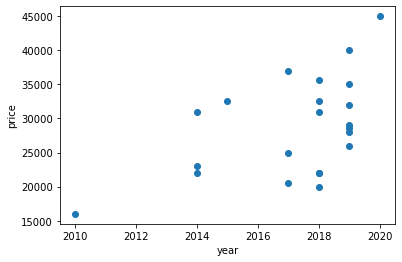

In [13]:
plt.scatter(df_cars['year'], df_cars['price']);
plt.xlabel('year');
plt.ylabel('price');

#### If we were to draw a straight line that fit the points the best, what would that look like?

#### The OLS regression line
Seaborn will plot the best fit line for us.

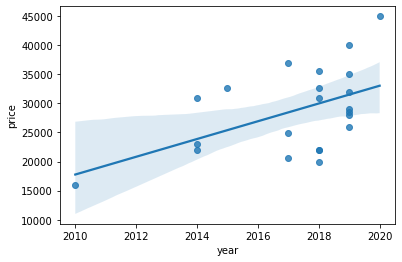

In [15]:
sns.regplot(x='year', y='price', data=df_cars);
# shading here is a confidence interval

#### Is that a line better fit the data than our old line that was just the mean? 

In [ ]:
# m is slope (rise/run), b is y-intercept
# ds version b0 is intercept and b1x1 is the slope/coefficient

Looks like it. We'll discuss evaluation metrics in a bit.

Let's look at how we make a regression line.

## Lines

This was the equation I learned for a line. Look familiar?

$$ \large y = mx + b$$

In data science it gets changed to 

$$ \large  y = \beta_0 + \beta_1 x_1 $$

### Errors

Our model isn't going to be perfect. The things our model doesn't capture are errors and denoted by $\epsilon$ (epsilon).


$$ \large y = \beta_0 + \beta_1 x_1 + \epsilon $$

### OLS Regression Modeling

We have _x_ and we have _y_. That's our data. 

## **Our model is trying to figure out the best betas. 😀**

$$ \large y = \hat \beta_0 + \hat \beta_1 x_1 $$


In [ ]:
# x is input data, y is what you want to predict- we're looking for 
# the constant and the coeefficienat (slope)

$\hat \beta_0$ is the y-intercept that our model learns. The point where the line crosses 0 on the y-axis.

$\hat \beta_1$ is the coefficient that we multiply by our $x_1$ variable. It's the slope. For ever 1 unit it change in $x_1$, y increases by the value of $\beta1$.

$y$ is the ground truth of our target variable. 


$$ \large \hat y =  \beta_0 +  \beta_1 x_1 $$

When we have a model that has been fit with the data (the betas have been computed) we can plug in a new *x* value and solve for $\hat y$. 

### $\hat y$ is your model's prediction! 


___ 
### Let's fit an OLS regression model in scikit-learn.

### Step 1: Assemble our X and y variables

 We need an X matrix that is n-by-p.
- n = rows
- p = features

A feature just means a predictor column.

In the simple linear regression case, p = 1. We have one feature. Usually you'll have more than 1 feature. 

In [23]:
# x input has to be 2d
# the double brackets make this a df, which will have 2d, 
# which sklearn requires
X = df_cars[['year']]

In [17]:
y = df_cars['price']

#### Why did we make X a DataFrame?

Because Scikit-learn wants us to - usually we have more than 1 predictor column (feature).

### Scikit-learn estimators expect a two dimensional object. 

Usually we have more than one predictor variable. Not here.

y is the outcome variable

In [18]:
X.shape

(22,)

#### What's the shape of y?

In [19]:
y.shape

(22,)

#### Why is the target variable a pandas Series or 1D numpy array? 

Scikit-learn supervised learning estimators are expecting a single output column. Estimators predict one value for each observation, generally.

### Step 2: Import our model class

In [20]:
# when python capitalizes thngs, it means that it is a class
# you instantiatie the class and then you can modify it
from sklearn.linear_model import LinearRegression

### Step 3: Instantiate the model

In [21]:
lr = LinearRegression() #instantiate the model

#### What is `lr`?

In [22]:
type(lr)

sklearn.linear_model._base.LinearRegression

### Step 4: Fit the model

In [24]:
# all of the info learned will live within lr 
lr.fit(X, y)

LinearRegression()

#### What did we just do?

Called the fit method on the object. We passed it X and y, in that order.

The fit method did matrix multiplication to estimate $\beta_0 $ and $\beta_1 $.

## Step 5: Check our model weights
#### Take a peek at the model's intercept coefficient

In [27]:
# anything ending in __ is something that has been instantiated
# this is the coefficient - so if year increases by 1, price increases by this
lr.coef_

array([1527.19134651])

In [28]:
lr.intercept_

-3051883.8530399096

#### What does that mean?

A car from year 0 wouldn't be worth anything. The model doesn't understand classic cars. 😉

#### What does that coefficient mean ($\beta_1$)?


We now have the following model of reality:

$$\hat{y} = -3,051,883 + 1,527  x$$

### ⭐️ For every one unit increase in year, the price of the car would be expected to increase by $1,527 ⭐️

## Step 6: Make predictions

If we had new data points for year we could pass it to the predict method to generate price predictions.

We don't have any new data, so let's just see what predictions our model would have made. This is the same as saying "Find the x value for a prediction on the plot and go up to our line. That value for y is our prediction."

We do this for all the X values.

In [30]:
yhat = lr.predict(X)
yhat

array([31515.47556882, 29988.2842223 , 31515.47556882, 25406.71018277,
       29988.2842223 , 28461.09287579, 33042.66691533, 31515.47556882,
       31515.47556882, 23879.51883626, 31515.47556882, 31515.47556882,
       17770.75345021, 29988.2842223 , 29988.2842223 , 31515.47556882,
       23879.51883626, 28461.09287579, 29988.2842223 , 28461.09287579,
       23879.51883626, 29988.2842223 ])

#### Why don't we pass `y`?

We are trying to predict y!

#### What type of object is yhat?

In [31]:
type(yhat)

numpy.ndarray

### We can plot the predictions, too!

Let's use the matplotlib API.

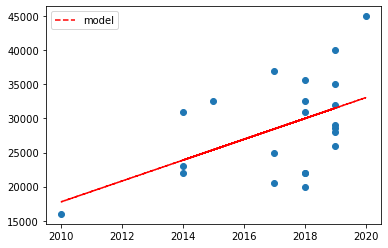

In [34]:
plt.scatter(X,y)
plt.plot(df_cars['year'], yhat, '--r', label = 'model');
plt.legend();

### Predictions

## Step 7: Score the predictions

### Mean squared error is a popular scoring metric. 
Lower is better. That's the case whenever "error" is in the metric name.

$$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 $$

$$ = \frac{1}{n} \sum e_i^2 $$

### MSE by hand:

#### Create residuals (a.k.a. errors). The left-over values.

*y* is our ground truth. The actual values.

In [35]:
y - yhat

0      3474.524431
1      2601.715778
2     -5525.475569
3      7183.289817
4      1001.715778
5      8528.907124
6     11947.333085
7     -2525.475569
8      8474.524431
9      7110.481164
10      474.524431
11    -2925.475569
12    -1780.753450
13    -7998.284222
14     5601.715778
15    -3525.475569
16    -1889.518836
17    -3471.092876
18    -7998.284222
19    -7871.092876
20     -889.518836
21    -9998.284222
Name: price, dtype: float64

In [36]:
(y-yhat)**2

0     1.207232e+07
1     6.768925e+06
2     3.053088e+07
3     5.159965e+07
4     1.003434e+06
5     7.274226e+07
6     1.427388e+08
7     6.378027e+06
8     7.181756e+07
9     5.055894e+07
10    2.251734e+05
11    8.558407e+06
12    3.171083e+06
13    6.397255e+07
14    3.137922e+07
15    1.242898e+07
16    3.570281e+06
17    1.204849e+07
18    6.397255e+07
19    6.195410e+07
20    7.912438e+05
21    9.996569e+07
Name: price, dtype: float64

In [37]:
# mean squared error
np.mean((y-yhat)**2)

36738569.7331386

Square the residuals. Then take the mean.

#### Compute the MSE

Let's check our answer with the result of the scikit-learn function that computes MSE for us.

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y, yhat)

36738569.7331386

In [40]:
# this is the root mean squared error. so on avg, our model is off on avg
# by $6k in our predictions. 
np.sqrt(mean_squared_error(y, yhat))

6061.235000652804

In [41]:
mean_squared_error(y, yhat, squared=False)

6061.235000652804

## You made your first Linear Regression Model🎉

___ 
# Linear Regression Exercise with Electricity

Now you make a Linear Regression Model and Null model for electricity demand data. Ignore that there is potentially some time series component to the data.

## The Data
Data source: [here](https://www.rdocumentation.org/packages/fpp2/versions/2.3/topics/elecdemand)

The data consist of electricity demand for Victoria, Australia every half-hour in 2014. We have three columns:

* Total electricity demand (in gigawatts)
* Whether or not it is a workday (0/1)
* Temperature (Celsius)

In [42]:
elec = pd.read_csv('data/elecdemand.csv')

In [43]:
elec.head()

,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


#### We'll limit our focus to only days in which it was at least 15 degrees Celsius (59 F)

In [46]:
elec15 = elec[elec['temp'] >= 15]

#### Plot temperature vs. demand
- Make the size of the dots small.
- Give it a descriptive title.
- Make it larger.

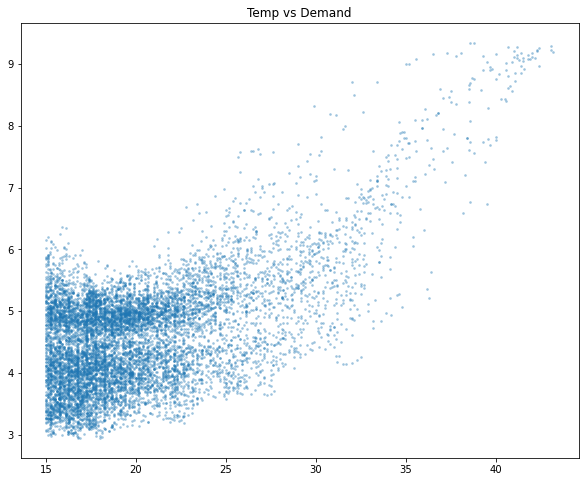

In [84]:
plt.figure(figsize= (10, 8))
plt.scatter(elec15['temp'],elec15['demand'], s=3, alpha=.3);
plt.title('Temp vs Demand');
# plt.plot(df_cars['year'], yhat, '--r', label = 'model');
# plt.legend();

### Step 1: Assemble our X and y variables

 We need an X matrix that is n-by-p (in this case, p = 1)
- n = rows
- p = features

X is the predictor variable. We are looking at temperature. 

y is the outcome variable

In [54]:
X = elec15[['temp']]

In [55]:
X

,temp
0,18.2
1,17.9
2,17.6
3,16.8
4,16.3
...,...
17515,17.7
17516,17.3
17517,17.1
17518,16.7


In [56]:
y = elec15['demand']

In [57]:
y

0        3.914647
1        3.672550
2        3.497539
3        3.339145
4        3.204313
           ...   
17515    3.724836
17516    3.761887
17517    3.809415
17518    4.135946
17519    4.217047
Name: demand, Length: 9919, dtype: float64

### Step 2: Import our model class

In [ ]:
# from sklearn.linear_model import LinearRegression  # already imported

### Step 3: Instantiate the model

In [58]:
lr = LinearRegression()

### Step 4: Fit the model

In [59]:
lr.fit(X, y)

LinearRegression()

## Step 5: Check our model weights

#### Interpret $\beta_1$


In [60]:
lr.coef_

array([0.11302131])

In [61]:
lr.intercept_

2.3463021186002946

## Step 6: Make predictions

In [71]:
yhat = lr.predict(X)

In [72]:
yhat

array([4.40328998, 4.36938359, 4.3354772 , ..., 4.27896654, 4.23375802,
       4.22245589])

### Plot the predictions

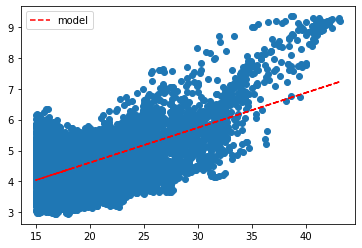

In [75]:
plt.scatter(X,y)
plt.plot(elec15['temp'], yhat, '--r', label='model');
plt.legend();

## Step 7: Score the predictions with MSE

In [77]:
mean_squared_error(y, yhat)

0.5080892768960054

In [76]:
mean_squared_error(y, yhat, squared=False)

0.7128038137496217

### Create the predictions for the "null model"

In [78]:
elec15['demand'].mean()

4.622494812629095

In [81]:
elec15['demand'].mode()

0       2.947998
1       2.948957
2       2.951854
3       2.963306
4       2.965945
          ...   
9914    9.276272
9915    9.281088
9916    9.283478
9917    9.338163
9918    9.345004
Length: 9919, dtype: float64

In [80]:
elec15['demand'].median()

4.62325903

#### The null MSE

#### Does your OLS regression model better fit the data than a null model? ⚠

You've seen linear regression with a single predictor variable. That's called _simple linear regression_. 

---
# Part II: Multiple Linear Regression

When you have more than 1 predictor variable you are doing _multiple linear regression_. 

Let's do regression with multiple predictor columns with the car data!  🚘

Here's mileage data for each observation. The data should help our model predict price better.

In [85]:
df_cars['miles'] = [
    11791, 14893, 13256, 37654, 38127, 42904, 1358, 10659, 
    9255, 32743, 15990, 17428, 14833, 25848, 12505, 6877, 82197, 27163, 70464, 30106, 86488, 6432
]

In [86]:
df_cars.head()

,price,year,miles
0,34990,2019,11791
1,32590,2018,14893
2,25990,2019,13256
3,32590,2015,37654
4,30990,2018,38127


#### Steps
- Set X and y. Now X will have multiple columns.
- EDA
- Instantiate a linear regression object.
- Fit the model.
- Compute the MSE. 
- Interpret the results.

In [87]:
X= df_cars[['year', 'miles']]
y=df_cars['price']

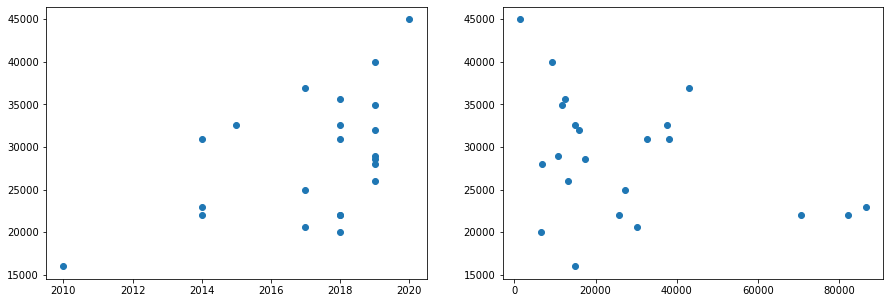

In [90]:
#scatterplot with yr vs price and a second with miles vs price
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(X['year'], y)
ax[1].scatter(X['miles'], y)

In [ ]:
lr=LinearRegression()

In [91]:
lr.fit(X,y)

LinearRegression()

In [92]:
lr.coef_

array([ 1.30579452e+03, -4.66003401e-02])

In [93]:
lr.intercept_

-2603986.2179376925

#### Do those correlations make sense?

### Let's model

In [96]:
car_1 = np.array([[2010, 50_000]])
lr.predict(car_1)

array([18330.75239701])

In [99]:
car_2 = np.array([[2009, 70_000]])
lr.predict(car_2)

array([16092.95107324])

In [ ]:
# cannot have more features than rows


In [100]:
yhat= lr.predict(X)

In [101]:
mean_squared_error(y, yhat, squared=False)

5983.766023844613

#### Did the model do better on the MSE metric?

yes, a bit!

#### What are the betas?

#### Interpret them.

Now we must add a caveat because we have multiple predictor variables.

For every 1 year increase in car, the expected price will increase by $1,306, **holding miles constant**.

For every 1 mile increase, the expected price will decrease by $0.0466, **holding model year constant**.

What price does our model predict for a 2019 car with 10,000 miles?

In [103]:
# _ in the number is just for readability
lr.predict(np.array([[2019, 10_000]]))

array([31946.91669202])

___
## MLR Electricity Exercise

For the electricity data, fit a linear regression model with temp and workday. 
- EDA
- Set X.
- Set y.
- Instantiate a linear regression object.
- Fit the model of demand versus temperature _and_ workday.
- Compute the MSE. 
- Interpret the results.

### Interpret the coefficients

## Assumptions of Linear Regression have been violated. 

---
Mnemonic for Linear Regression Assumptions:

## LINEM
### L - Linear relationship
### I - Independent errors (time series issue, often)
### N - Normally distributed errors
### E - Equal variance of errors (homoscedasticity)
### M - No Multicolinearlity 

We'll learn more about LINEM assumptions of linear regression as we go.

---

___
# Additional, not-really-BONUS topics

## ANRBT #1: Multicollinearity
Multicollinearity occurs when you have two or more $x$-variables that are correlated with each other. 

This situation ruins model interpretability and inference. 

You can't tell which independent variable should get how much credit for affecting the outcome variable.

Generally, the model still fits well. 

Statisticians argue about how much is too much. The Variance Inflation Factor > 5 or 10 is a common cutoff. So is just looking at the correlation table and saying eh, around .9 is too much.

If you are not concerned with WHY your model works, but just how well it performs, you may not care much about multcollinearity. But you generally care about model explainability. 😀 You'll learn about explainability throughout the course.

Use a version of Okham's Razor for selecting among potential models. The simplest is the best. Use the fewest number of features that predict well.


## ANRBT #2: Matrix Notation and Solution

Predict 1 outcome value for 1 observation:

$$ \large \mathbf{\hat{y}= \hat\beta_{0} + \hat\beta_{1}x_{1} + \hat\beta_{2}x_{2} + \ldots \hat\beta_{p}x_{p}} + \varepsilon$$


Notes
- The above variables are vectors.
- The hats often get left off the betas.
- _p_ is the number of independent variables (people denote this with many other variables other than _p_).


Recall our matrix notations:

$$
\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}^T
$$

$$
\beta = \begin{bmatrix} \beta_0 & \beta_1 & \cdots & \beta_p \end{bmatrix}^T
$$

$$
\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np} \\ 
\end{bmatrix}
$$

The column of 1s is the y-intercept.

It then works out we can write concisely:

$$\mathbf{y} = \mathbf{X}\beta + \varepsilon$$

Remember that $\varepsilon$ is the errors.

Which makes our formula for prediction:

$$\mathbf{\hat{y}} = \mathbf{X}\hat{\beta}$$

To find the betas, we use the known X and y values.

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Look confusing? Check out a nice explanation [here](https://online.stat.psu.edu/stat462/node/132/). 

The take away here is:

#### **The solution to OLS linear regression problems exist in closed form (it 100% exists, you don't have to approximate it) and can be computed by matrix multiplication.**

---
## ANRBT #3: The `statsmodels` Library
Scikit-learn does not hold a monopoly on doing linear regression in Python. 


statsmodels is the statistician's Python library (as opposed to the machine learning library). Scipy is the other primary statistician's library.

In [ ]:
import statsmodels.api as sm

In [ ]:
!pip install statsmodels # careful, python 3.9 on a mac seems to break still

In [ ]:
pwd

In [ ]:
elec = pd.read_csv('./data/elecdemand.csv')

In [ ]:
X = elec[["temp", "workday"]]
X = sm.add_constant(X)    # have to add the y-intercept column manually
y = elec["demand"]

ols = sm.OLS(y, X).fit()  # y comes before X different than scikit-learn

In [ ]:
ols.summary()

#### Isn't that a nice bit of info?

⚠️ Note: with statsmodels you have to explicitly add the intercept with `sm.add_constant()` function. The whole model gets returned.

___ 
# Conclusions and Takeaways:

I recommend you always start with a basic model with one or two numeric features.

* Supervised machine learning is an important and vast topic we'll spend much of our course exploring.
* Linear regression is a **supervised "white-box" regression model**.
* OLS linear regression is simple, common, and powerful.
* One of its more enticing features is that its **coefficients are interpretable!** (If some assumptions are met).😀

## Check for understanding

- What does a Linear Regression model do?
- What do the betas represent in a simple linear regression equation?
- How do you import a Linear Regression model with scikit-learn?
